## Planning

## Acquisition

In [457]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy import stats

from pydataset import data

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from prepare import prep_telco

In [458]:
df = acquire.get_telco_data()
df.head()

,Unnamed: 0,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month


what columns do we have?

Unnamed: 0                    int64 <br>
    -this is the unique id with 7043 unique values. will need this later for .csv, but will drop in preparation for now <br>
    
contract_type_id              int64 <br>
    -there are 3 contract types here that are represented numerically <br>
        1 - month to month contract <br>
        2 - 1 year contract <br>
        3 - 2 year contract <br>
        
payment_type_id               int64 <br>
    -there are 4 types of payments that are represented numerically <br>
        1 - electronic check <br>
        2 - mailed check <br>
        3 - bank transfer <br>
        4 - credit card (automatic) <br>
        
internet_service_type_id      int64 <br>
    -there are 3 types of internet service that are represented numerically <br>
        1 - DSL <br>
        2 - fiber optic <br>
        3 - no internet service <br>
    
customer_id                  object <br>
    -there are 7043 customer ids each representing a unique customer <br>
    
gender                       object <br>
    - there are two gender types "male" and "female" <br>
    
senior_citizen                int64 <br>
    - senior citizens are represented numerically <br>
        1 - is a senior citizen <br>
        0 - is not a senior citizen <br>
    
partner                      object <br>
    - whether or not the customer has a partner is represented by "No" and "Yes" <br>
        
dependents                   object <br>
     - whether or not the customer has dependent(s) is represented by "No" and "Yes" <br>
     
tenure                        int64 <br>
    - customer tenure is represented numerically in the amount of months a customer has been at Telco <br>
    
phone_service                object <br>
    - whether or not the customer has phone service is represented by "No" and "Yes" <br>
    
multiple_lines               object <br>
    - whether or not the customer has multiple lines is represented by "No", "Yes", and "No phone service" <br>
    
online_security              object <br>
    - whether or not the customer has online sercurity is represented by "No", "Yes", and "No internet service" <br>
    
online_backup                object <br>
    - whether or not the customer has online backup is represented by "No", "Yes", and "No internet service" <br>
    
device_protection            object <br>
    - whether or not the customer has device protection is represented by "No", "Yes", and "No internet service" <br>
    
tech_support                 object <br>
    - whether or not the customer has tech support is represented by "No", "Yes", and "No internet service" <br>
    
streaming_tv                 object <br>
    - whether or not the customer has tv streaming is represented by "No", "Yes", and "No internet service" <br>
    
streaming_movies             object <br>
    - whether or not the customer has movie streaming is represented by "No", "Yes", and "No internet service" <br>

paperless_billing            object <br>
    - whether or not the customer has paperless billing is represented by "No" and "Yes" <br>
    
monthly_charges             float64 <br>
    - the customer's average monthly charges is represented numerically
    
total_charges                object <br>
    - the customer's all time charges is represented as an object data type, but can be viewed numerically <br>
    
churn                        object <br>
    - whether or not a customer has churned is represented by "Yes" and "No" <br>
    
internet_service_type        object <br>
    - there are 3 internet service options: "Fiber optic", "DSL", and "None" <br>
    
payment_type                 object <br>
    - there are 4 payment methods: <br>
    "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)" <br>
    
contract_type                object <br>
    - there are 3 contract types:
        "Month-to-month", "Two year", "One year"
    

In [459]:
df.dtypes

Unnamed: 0                    int64
contract_type_id              int64
payment_type_id               int64
internet_service_type_id      int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
internet_service_type        object
payment_type                 object
contract_type                object
dtype: object

In [460]:
df['Unnamed: 0'].nunique()

7043

In [5]:
df['contract_type_id'].value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [6]:
df['payment_type_id'].value_counts()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

In [7]:
df['internet_service_type_id'].value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [8]:
len(df['customer_id'])

7043

In [9]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [11]:
df.partner.value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [12]:
df.dependents.value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [13]:
df.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [14]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [15]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [16]:
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [17]:
df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [18]:
df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [19]:
df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [20]:
df.streaming_tv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [21]:
df.streaming_movies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [22]:
df.paperless_billing.value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [23]:
df.monthly_charges.head(20)

0      65.60
1      59.90
2      73.90
3      98.00
4      83.90
5      69.40
6     109.70
7      84.65
8      48.20
9      90.45
10     45.20
11    116.80
12     68.95
13    101.30
14     45.05
15     95.75
16     61.25
17     72.10
18     62.70
19     25.10
Name: monthly_charges, dtype: float64

In [24]:
df.total_charges.head()

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: total_charges, dtype: object

In [25]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [26]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [27]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [28]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

Looking at redundant columns, columns to drop

## Preparation

In [461]:
from prepare import prep_telco

In [462]:
df = prep_telco(df)

In [1]:
pd.set_option('display.max_columns', None)
df

NameError: name 'pd' is not defined

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   e_gender_male          7032 non-null   uint8  
 1   e_partner              7032 non-null   uint8  
 2   e_dependents           7032 non-null   uint8  
 3   e_phone_service        7032 non-null   uint8  
 4   e_multiple_lines       7032 non-null   uint8  
 5   e_tech_support         7032 non-null   uint8  
 6   e_tv_stream            7032 non-null   uint8  
 7   e_movies_stream        7032 non-null   uint8  
 8   e_paperless_bill       7032 non-null   uint8  
 9   e_online_backup        7032 non-null   uint8  
 10  e_online_sec           7032 non-null   uint8  
 11  e_device_protection    7032 non-null   uint8  
 12  e_churn                7032 non-null   uint8  
 13  e_fiber_optic          7032 non-null   uint8  
 14  e_no_internet          7032 non-null   uint8  
 15  e_cc

In [465]:
df.isna().sum()

e_gender_male            0
e_partner                0
e_dependents             0
e_phone_service          0
e_multiple_lines         0
e_tech_support           0
e_tv_stream              0
e_movies_stream          0
e_paperless_bill         0
e_online_backup          0
e_online_sec             0
e_device_protection      0
e_churn                  0
e_fiber_optic            0
e_no_internet            0
e_cc_auto                0
e_check_electric         0
e_check_mail             0
e_oneyr                  0
e_twoyr                  0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
i

In [466]:
len(df)

7032

In [467]:
df['senior_citizen'] = df['senior_citizen'].astype('object')

In [468]:
df['senior_citizen'].value_counts()

0    5890
1    1142
Name: senior_citizen, dtype: int64

In [469]:
df['senior_citizen'] = pd.Series(np.where(df.senior_citizen.values == 0, 'No', 'Yes'),
          df.index)

In [470]:
df['senior_citizen'].value_counts()

No     5890
Yes    1142
Name: senior_citizen, dtype: int64

In [471]:
df.columns

Index(['e_gender_male', 'e_partner', 'e_dependents', 'e_phone_service',
       'e_multiple_lines', 'e_tech_support', 'e_tv_stream', 'e_movies_stream',
       'e_paperless_bill', 'e_online_backup', 'e_online_sec',
       'e_device_protection', 'e_churn', 'e_fiber_optic', 'e_no_internet',
       'e_cc_auto', 'e_check_electric', 'e_check_mail', 'e_oneyr', 'e_twoyr',
       'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'payment_type', 'contract_type'],
      dtype='object')

In [478]:
account_categorical = df[['paperless_billing','payment_type', 'contract_type']]

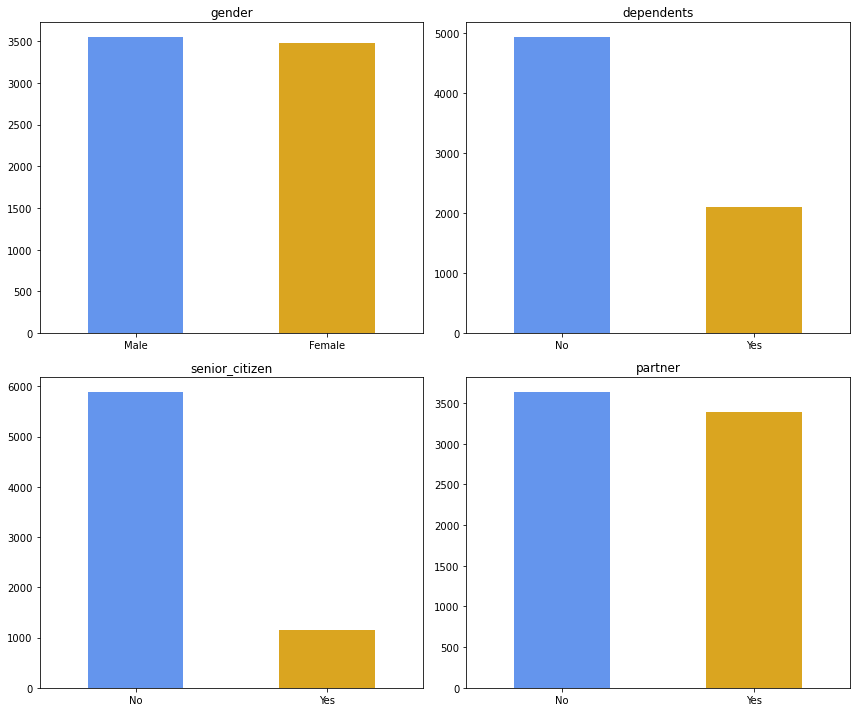

In [583]:
demographics_categorical = ['gender', 'senior_citizen', 'partner', 'dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))

for i, item in enumerate(demographics_categorical):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i,0],rot = 0)
        
    elif i >=2 :
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-3,1],rot = 0)
    
 
    ax.set_title(item)

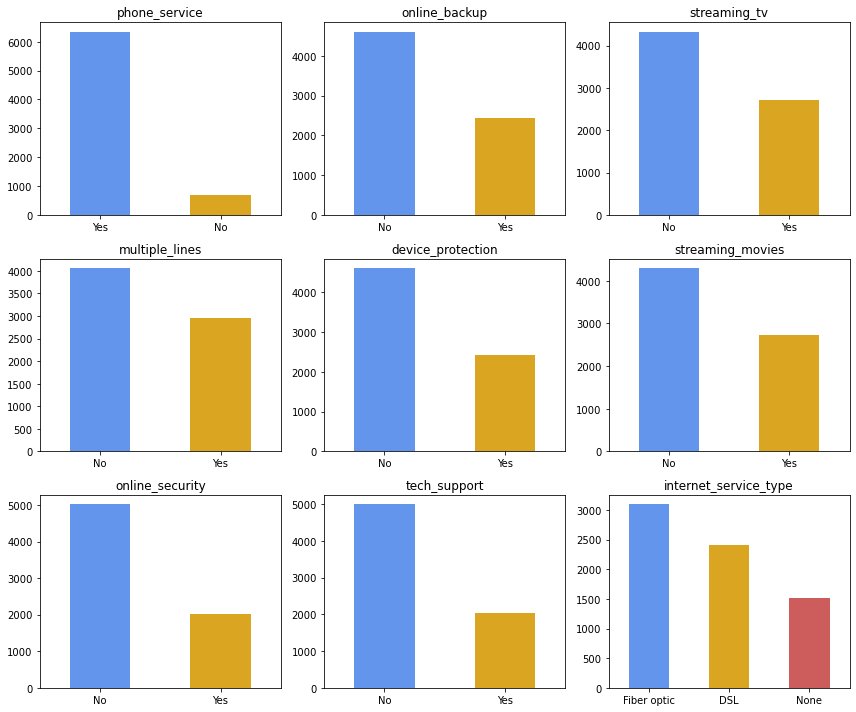

In [602]:
service_categorical = ['phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'internet_service_type']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (12, 10))

for i, item in enumerate(service_categorical):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-3,1],rot = 0)
        
    elif i < 10 :
        ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod", "indianred"], ax=axes[i-6,2],rot = 0)
    
    ax.set_title(item)

In [612]:
df.paperless_billing.value_counts()

Yes    4168
No     2864
Name: paperless_billing, dtype: int64

TypeError: cannot unpack non-iterable Figure object

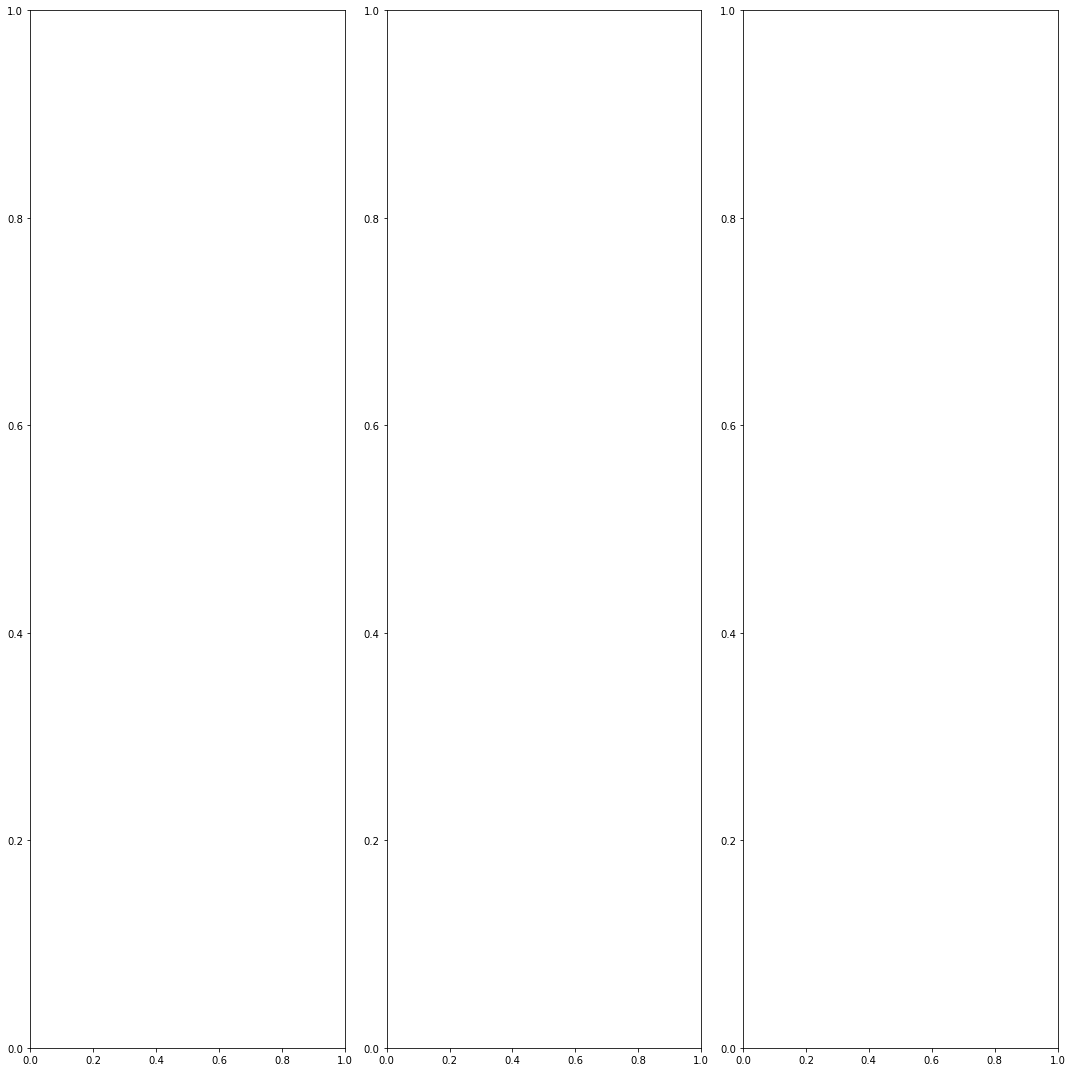

In [630]:
boxplot(df['paperless_billing'])
(df['payment_type'])
(df['contract_type'])

fig.show

ValueError: Invalid color color

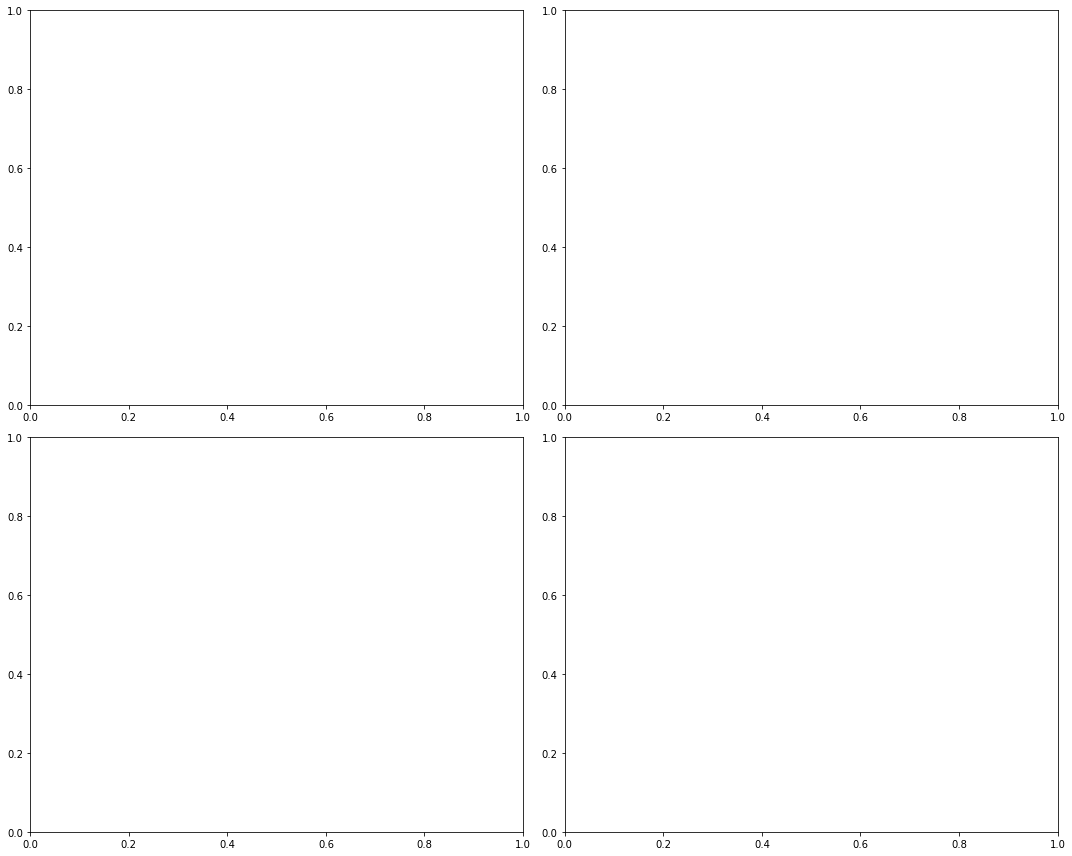

In [562]:
# fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,12))
    
# for i, item in enumerate(demographics_categorical):
#     if i < 2:
#         ax = df[item].value_counts().plot(kind = 'bar',  ax=axes[i,0], rot = 0)
# #         print(col)
# #         sns.countplot(data=df, x=col)
# #         plt.title(col)
# #         plt.show()
        
#     elif i >= 2:
#         ax = df[item].value_counts().plot(kind = 'bar',color= 'color', ax=axes[i-3, 1],rot = 0)
        
#     ax.set_title(item)
#plt.bar(x+0.2, top5_alcohol['beer_servings'],
        #width, color='gold', label='beer')
# plt.title('TOP5 countries by pure alcohol consumption', fontsize=25)
# plt.xlabel(None)
# plt.xticks(top5_alcohol.index, top5_alcohol['country'], fontsize=17)
# plt.ylabel('Servings per person', fontsize=20)
# plt.yticks(fontsize=17)
# sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
# plt.show()

    


visualize univariate data

## Exploration and Pre-processing

relationships between 2 or more variables on train data

statistical tests

In [36]:
from prepare import train_validate_test_split

In [37]:
train, validate, test = train_validate_test_split(df, target="churn", seed=123)

In [38]:
train

,e_gender_male,e_partner,e_dependents,e_phone_service,e_multiple_lines,e_tech_support,e_tv_stream,e_movies_stream,e_paperless_bill,e_online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
5919,0,0,0,1,1,1,0,0,1,1,...,Yes,No,No,Yes,71.10,4299.20,No,DSL,Credit card (automatic),One year
1915,1,0,1,1,1,0,0,0,1,1,...,No,No,No,Yes,85.45,6028.95,No,Fiber optic,Credit card (automatic),One year
5054,0,1,1,1,1,0,0,0,1,0,...,No,No,No,Yes,25.75,882.55,No,None,Electronic check,Month-to-month
2355,1,1,1,1,0,0,0,0,0,0,...,No,No,No,No,19.20,19.20,No,None,Mailed check,Month-to-month
6279,1,0,0,1,0,1,0,0,0,0,...,Yes,No,No,No,54.00,1055.90,No,DSL,Mailed check,One year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,0,0,1,1,0,1,0,1,0,...,No,Yes,No,Yes,88.95,2072.75,No,Fiber optic,Credit card (automatic),Month-to-month
3763,0,1,1,1,1,0,1,1,1,0,...,No,Yes,Yes,Yes,100.25,1064.65,Yes,Fiber optic,Electronic check,Month-to-month
3444,0,1,1,1,1,0,0,0,0,0,...,No,No,No,No,25.25,555.40,No,None,Credit card (automatic),Two year
1002,1,0,1,1,1,0,1,0,1,1,...,No,Yes,No,Yes,89.10,1949.40,No,Fiber optic,Credit card (automatic),Month-to-month


### Senior Citizen

𝐻0  : There is no relationship between senior citizen and customer churn

𝐻𝑎 : There is a relationship between senior citizen and customer churn

In [39]:
alpha = .05

In [40]:
observed = pd.crosstab(train.churn, train.senior_citizen)
observed

senior_citizen,0,1
churn,,
No,2527,364
Yes,775,271


In [41]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

1.7561315684822571e-23

In [42]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### Streaming TV

𝐻0 : There is no relationship between streaming_tv and customer churn

𝐻𝑎 : There is a relationship between streaming_tv and customer churn

In [43]:
observed = pd.crosstab(train.churn, train.streaming_tv)
observed

streaming_tv,No,Yes
churn,,
No,1807,1084
Yes,609,437


In [44]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

0.016371276214347655

In [45]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### Phone Service

𝐻0 : There is no relationship between phone service and customer churn

𝐻𝑎 : There is a relationship between phone service and customer churn

In [46]:
observed = pd.crosstab(train.churn, train.phone_service)
observed

phone_service,No,Yes
churn,,
No,282,2609
Yes,91,955


In [47]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

0.3490605904235855

In [48]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis


### Partner

𝐻0 : There is no relationship between partner and customer churn

𝐻𝑎 : There is a relationship between partner and customer churn

In [49]:
observed = pd.crosstab(train.churn, train.partner)
observed

partner,No,Yes
churn,,
No,1364,1527
Yes,663,383


In [50]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

3.578598859815084e-19

In [51]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### Dependents

𝐻0 : There is no relationship between dependents and customer churn

𝐻𝑎 : There is a relationship between dependents and customer churn

In [52]:
observed = pd.crosstab(train.churn, train.dependents)
observed

dependents,No,Yes
churn,,
No,1885,1006
Yes,860,186


In [53]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

1.5385742575781703e-24

In [54]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### multiple lines

𝐻0 : There is no relationship between multiple lines and customer churn

𝐻𝑎 : There is a relationship between multiple lines and customer churn

In [55]:
observed = pd.crosstab(train.churn, train.multiple_lines)
observed

multiple_lines,No,Yes
churn,,
No,1711,1180
Yes,557,489


In [56]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

0.0009985216252164028

In [57]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### online security

𝐻0 : There is no relationship between online security and customer churn

𝐻𝑎 : There is a relationship between online security and customer churn

In [58]:
observed = pd.crosstab(train.churn, train.online_security)
observed

online_security,No,Yes
churn,,
No,1902,989
Yes,883,163


In [59]:
info, p, info2, info3 = stats.chi2_contingency(observed)
p

1.2131172913764837e-29

In [60]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### online backup

𝐻0 : There is no relationship between online backup and customer churn

𝐻𝑎 : There is a relationship between online backup and customer churn

In [61]:
observed = pd.crosstab(train.churn, train.online_backup)
observed
info, p, info2, info3 = stats.chi2_contingency(observed)
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### device protection

𝐻0 : There is no relationship between device protection and customer churn

𝐻𝑎 : There is a relationship between device protection and customer churn

In [62]:
observed = pd.crosstab(train.churn, train.device_protection)
observed
info, p, info2, info3 = stats.chi2_contingency(observed)
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### tech support

𝐻0 : There is no relationship between tech support and customer churn

𝐻𝑎 : There is a relationship between tech support and customer churn

In [63]:
observed = pd.crosstab(train.churn, train.tech_support)
observed
info, p, info2, info3 = stats.chi2_contingency(observed)
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### streaming movies

𝐻0 : There is no relationship between streaming movies and customer churn

𝐻𝑎 : There is a relationship between streaming movies and customer churn

In [64]:
observed = pd.crosstab(train.churn, train.streaming_movies)
observed
info, p, info2, info3 = stats.chi2_contingency(observed)
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### paperless billing

𝐻0 : There is no relationship between streaming movies and customer churn

𝐻𝑎 : There is a relationship between streaming movies and customer churn

In [65]:
observed = pd.crosstab(train.churn, train.paperless_billing)
observed
info, p, info2, info3 = stats.chi2_contingency(observed)
if p < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


### tenure

In [66]:
churn_sample = train[train.churn == 'Yes'].tenure
overall_mean = train.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p, alpha)

-23.413234891011875 8.47428580109463e-98 0.05


In [67]:
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


<AxesSubplot:xlabel='churn', ylabel='tenure'>

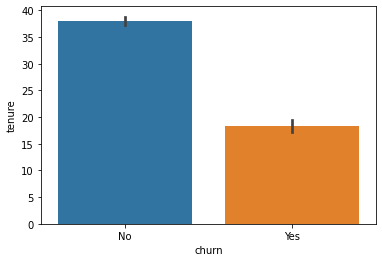

In [68]:
sns.barplot(x='churn',y='tenure',data=train) 

In [368]:
train.internet_service_type

5919            DSL
1915    Fiber optic
5054           None
2355           None
6279            DSL
           ...     
394     Fiber optic
3763    Fiber optic
3444           None
1002    Fiber optic
4192           None
Name: internet_service_type, Length: 3937, dtype: object

In [384]:
churn_sample = train[train.internet_service_type == 'Fiber optic'].monthly_charges
overall_mean = train.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p, alpha)

194.0908851239243 0.0 0.05


In [385]:
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [377]:
train.monthly_charges.groupby(train.internet_service_type).mean()

internet_service_type
DSL            58.405564
Fiber optic    91.841405
None           21.056747
Name: monthly_charges, dtype: float64

In [378]:
train.internet_service_type.value_counts()

Fiber optic    1722
DSL            1348
None            867
Name: internet_service_type, dtype: int64

## Modeling

Baseline Accuracy

In [69]:
baseline_accuracy = ((train.churn == 'No').sum() / len(train.churn))
baseline_accuracy

0.7343154686309372

### Decision Tree

In [70]:
train.dtypes

e_gender_male              uint8
e_partner                  uint8
e_dependents               uint8
e_phone_service            uint8
e_multiple_lines           uint8
e_tech_support             uint8
e_tv_stream                uint8
e_movies_stream            uint8
e_paperless_bill           uint8
e_online_backup            uint8
e_online_sec               uint8
e_device_protection        uint8
e_churn                    uint8
e_fiber_optic              uint8
e_no_internet              uint8
e_cc_auto                  uint8
e_check_electric           uint8
e_check_mail               uint8
e_oneyr                    uint8
e_twoyr                    uint8
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_suppo

In [72]:
X_train = train.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_train = train.churn

X_validate = validate.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_validate = validate.churn

X_test = test.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_test = test.churn

In [73]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [74]:
clf = clf.fit(X_train, y_train)

[Text(558.0, 475.65000000000003, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]'),
 Text(279.0, 339.75, 'e_fiber_optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]'),
 Text(139.5, 203.85000000000002, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]'),
 Text(69.75, 67.94999999999999, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]'),
 Text(209.25, 67.94999999999999, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]'),
 Text(418.5, 203.85000000000002, 'tenure <= 1.5\ngini = 0.414\nsamples = 567\nvalue = [166, 401]'),
 Text(348.75, 67.94999999999999, 'gini = 0.206\nsamples = 129\nvalue = [15, 114]'),
 Text(488.25, 67.94999999999999, 'gini = 0.452\nsamples = 438\nvalue = [151, 287]'),
 Text(837.0, 339.75, 'e_fiber_optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]'),
 Text(697.5, 203.85000000000002, 'e_twoyr <= 0.5\ngini = 0.099\nsamples = 1411\nvalue = [1337, 74]'),
 Text(627.75, 67.94999999999999, 'gini = 0.155\nsamples = 742\nva

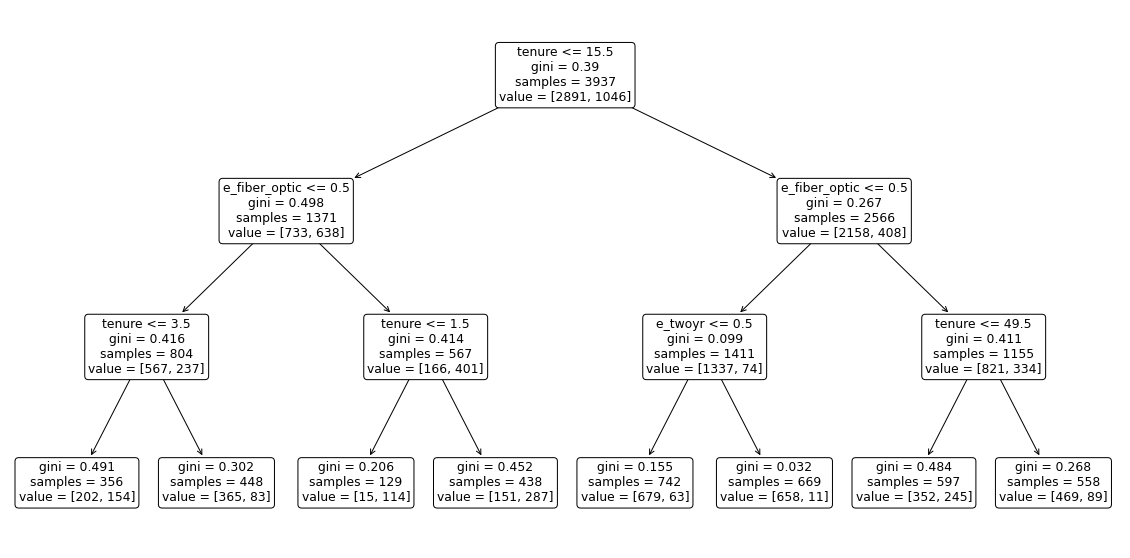

In [75]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [122]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [123]:
clf = clf.fit(X_train, y_train)

[Text(558.0, 489.24, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]'),
 Text(279.0, 380.52000000000004, 'e_fiber_optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]'),
 Text(139.5, 271.8, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]'),
 Text(69.75, 163.08000000000004, 'e_no_internet <= 0.5\ngini = 0.491\nsamples = 356\nvalue = [202, 154]'),
 Text(34.875, 54.360000000000014, 'gini = 0.495\nsamples = 203\nvalue = [91, 112]'),
 Text(104.625, 54.360000000000014, 'gini = 0.398\nsamples = 153\nvalue = [111, 42]'),
 Text(209.25, 163.08000000000004, 'monthly_charges <= 20.925\ngini = 0.302\nsamples = 448\nvalue = [365, 83]'),
 Text(174.375, 54.360000000000014, 'gini = 0.111\nsamples = 152\nvalue = [143, 9]'),
 Text(244.125, 54.360000000000014, 'gini = 0.375\nsamples = 296\nvalue = [222, 74]'),
 Text(418.5, 271.8, 'tenure <= 1.5\ngini = 0.414\nsamples = 567\nvalue = [166, 401]'),
 Text(348.75, 163.08000000000004, 'e_tech_support <= 0.5\ngini = 0

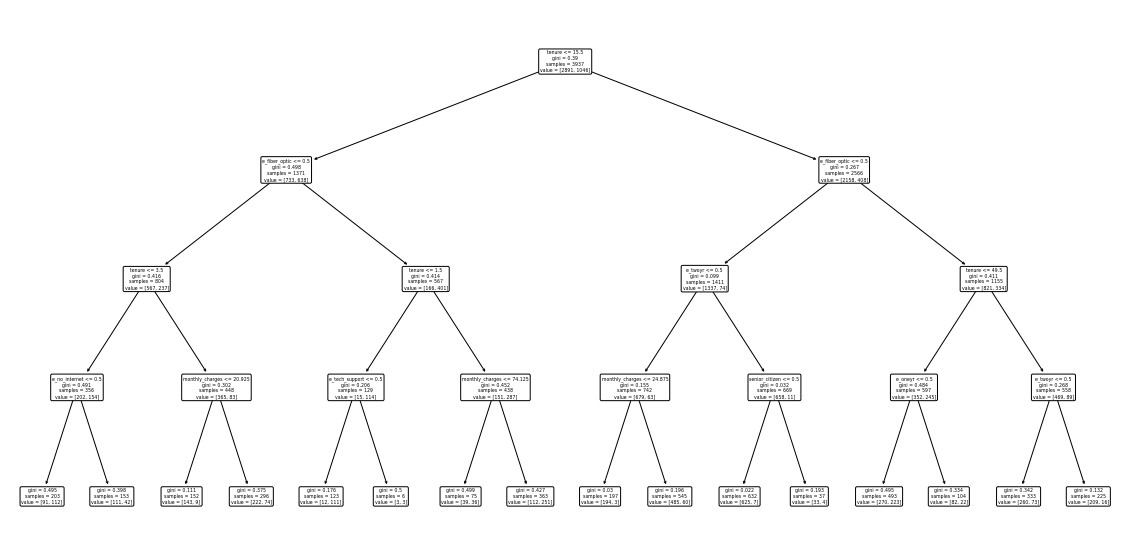

In [124]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [125]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [126]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.88990826, 0.11009174],
       [0.78078078, 0.21921922],
       [0.88990826, 0.11009174],
       [0.7254902 , 0.2745098 ],
       [0.88990826, 0.11009174]])

In [127]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [128]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      2891
         Yes       0.69      0.45      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



In [2]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

NameError: name 'clf' is not defined

In [130]:
# Repeat Decision Tree with different max_depth paying close attention to recall

### Random Forest

In [187]:
rf = RandomForestClassifier(max_depth=8, 
                            random_state=123)
rf

RandomForestClassifier(max_depth=8, random_state=123)

In [188]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=123)

In [189]:
feature_importances = rf.feature_importances_
feature_importances

array([0.0119177 , 0.01644875, 0.01473822, 0.00635085, 0.01326485,
       0.03405379, 0.01115896, 0.01217801, 0.02359098, 0.01812471,
       0.03969525, 0.01447702, 0.12244777, 0.03463868, 0.01258048,
       0.05068026, 0.0093239 , 0.05238402, 0.08506702, 0.01868925,
       0.26079763, 0.1373919 ])

In [190]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

tenure                 0.260798
monthly_charges        0.137392
e_fiber_optic          0.122448
e_twoyr                0.085067
e_oneyr                0.052384
e_check_electric       0.050680
e_online_sec           0.039695
e_no_internet          0.034639
e_tech_support         0.034054
e_paperless_bill       0.023591
senior_citizen         0.018689
e_online_backup        0.018125
e_partner              0.016449
e_dependents           0.014738
e_device_protection    0.014477
e_multiple_lines       0.013265
e_cc_auto              0.012580
e_movies_stream        0.012178
e_gender_male          0.011918
e_tv_stream            0.011159
e_check_mail           0.009324
e_phone_service        0.006351
dtype: float64

In [191]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

y_pred, y_pred_proba

(array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object),
 array([[0.9256475 , 0.0743525 ],
        [0.87541879, 0.12458121],
        [0.92810107, 0.07189893],
        ...,
        [0.98222772, 0.01777228],
        [0.57627066, 0.42372934],
        [0.82239428, 0.17760572]]))

In [192]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [193]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      2891
         Yes       0.75      0.57      0.65      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.75      0.77      3937
weighted avg       0.83      0.84      0.83      3937



In [194]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


### K- Nearest Neighbor

In [324]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [325]:
KNeighborsClassifier()

KNeighborsClassifier()

In [326]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
y_pred, y_pred_proba

(array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object),
 array([[0.9, 0.1],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [1. , 0. ],
        [0.6, 0.4],
        [0.9, 0.1]]))

In [327]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [328]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.94      0.88      2891
         Yes       0.73      0.48      0.58      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.71      0.73      3937
weighted avg       0.81      0.82      0.80      3937



In [329]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.78


### Logistic Regression

In [330]:
X_train = train.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_train = train.e_churn

X_validate = validate.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_validate = validate.e_churn

X_test = test.drop(columns=['e_churn', 'churn','gender','partner', 'dependents', 'phone_service',
                             'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'total_charges', 'internet_service_type', 'payment_type', 'contract_type'])
y_test = test.e_churn

In [402]:
logit = LogisticRegression(C=.1, class_weight="balanced", random_state=123, intercept_scaling=1, solver='lbfgs')

In [403]:
logit.fit(X_train, y_train)
LogisticRegression(C=.1, class_weight="balanced", random_state=123)

LogisticRegression(C=0.1, class_weight='balanced', random_state=123)

In [399]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.0131715  -0.0293839  -0.12000057 -0.87610503  0.20446413 -0.33083456
  -0.08482176 -0.00414748  0.25538727 -0.1333196  -0.51103257 -0.10721356
   0.48055364 -0.31725553 -0.03449649  0.26307064 -0.06416164 -0.75958858
  -1.33988974  0.28259453 -0.03217524  0.02239566]]
Intercept: 
 [0.20329254]


In [404]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

y_pred, y_pred_proba

(array([0, 0, 0, ..., 0, 1, 0], dtype=uint8),
 array([[0.90718111, 0.09281889],
        [0.84194303, 0.15805697],
        [0.73749605, 0.26250395],
        ...,
        [0.89856893, 0.10143107],
        [0.24508215, 0.75491785],
        [0.66282207, 0.33717793]]))

In [405]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.76
